# Final Project Description #


Historical 1800 and 1830 Chinese Flood and Drought Data Analysis

We have acquired 250 pages of accounts of climate, harvests and data from Chinese sources. The data is sorted by province and there is a latitude and longitude, Chinese name and English name for each city in word. The data covers the time from 1800 to 1830. Currently we have organized two years of data including geographical locations (longitudes, latitudes), provinces and city names into excel format. In this project I hope to turn the different types of climate and harvest data into time series and maps that could be accessed by researchers in general. I also hope to look into the current flood and drought data in China for the present.  The climate in China is affected by El Nino and La Nina cycles as well as by volcanic eruptions so this data set could be used to assess the relative affects of volcanism on climate and agriculture in China during this 30-year period. If possible, I can also look at PMIP (paleomodel intercomparison) data that overlaps with this period to see how well these climate signals are reproduced in existing climate models. I can do an EOF analysis to find out the principal component and compare 1800s and current climate.



# Import Data #
The drought and flood data that I used here are translated by my colleagues and me at Lamont. The Volcanic Explosivity Index is found from Chris Newhall's research at USGS.


In [67]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from netCDF4 import Dataset
plt.rcParams['figure.figsize'] = (12,7)

df = pd.read_csv('tot_1830_edited.csv',na_values=[-999, 'NaN'])
df.head()

,Province,Name,Lat,Lon,Dro,Prec,Flood
0,Greater Beijing,Beijing,39.90,116.40,NaN,NaN,NaN
1,Greater Beijing,Miyun,40.39,116.84,NaN,NaN,NaN
2,Greater Beijing,Pinggu,40.13,117.11,NaN,NaN,NaN
3,Greater Beijing,Tong (now Tongzhou district in Beijing),39.90,116.70,NaN,NaN,NaN
4,Greater Beijing,Shunyi,40.12,116.71,NaN,NaN,NaN


In [37]:
df_1800 = pd.read_csv('1800.csv',na_values=[-999, 'NaN'])
df_1800.head()

,Province,Name,Lat,Lon,Dro,Flood,Prec
0,Greater Beijing,Beijing,39.90,116.40,NaN,NaN,NaN
1,Greater Beijing,Miyun,40.39,116.84,NaN,NaN,NaN
2,Greater Beijing,Pinggu,40.13,117.11,NaN,NaN,NaN
3,Greater Beijing,Tong (now Tongzhou district in Beijing),39.90,116.70,NaN,NaN,NaN
4,Greater Beijing,Shunyi,40.12,116.71,NaN,NaN,NaN


In [38]:
df_vei = pd.read_csv('vei.csv',na_values=[-999,'Nan'])
df_vei.head()

,volcano,lon,lat,month,date,year,elevation,VEI
0,Hekla,63.98,-19.70,July,25,1510.0,1491,4
1,Cotopaxi,-0.65,-78.43,June,--,1534.0,5897,4
2,St.Helens,46.20,-122.18,--,--,1540.0,2549,5
3,Agua_de_Pau,37.77,-25.47,June,28,1563.0,948,4
4,San_Salvador,13.74,-89.29,-,-,15757.0,1850,4


In [260]:
ds = xr.open_dataset('pdsi.monthly.maps.1870-2005.fawc=1.r2.5x2.5.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 55, lon: 144, time: 1632)
Coordinates:
  * lat      (lat) float32 -58.75 -56.25 -53.75 -51.25 -48.75 -46.25 -43.75 ...
  * lon      (lon) float32 -178.75 -176.25 -173.75 -171.25 -168.75 -166.25 ...
  * time     (time) float32 1870.0416 1870.125 1870.2084 1870.2916 1870.375 ...
Data variables:
    PDSI     (time, lat, lon) float32 ...
Attributes:
    creation_time:  Tue Sep 18 11:03:50 MDT 2007
    Conventions:    NCAR
    source_file:    pdsi.monthly.maps.1870-2005.fawc=1.r2.5x2.5
    description:    \nMonthly Palmer Drought Severity Index (PDSI) calculated...

In [261]:
ds.keys()

KeysView(<xarray.Dataset>
Dimensions:  (lat: 55, lon: 144, time: 1632)
Coordinates:
  * lat      (lat) float32 -58.75 -56.25 -53.75 -51.25 -48.75 -46.25 -43.75 ...
  * lon      (lon) float32 -178.75 -176.25 -173.75 -171.25 -168.75 -166.25 ...
  * time     (time) float32 1870.0416 1870.125 1870.2084 1870.2916 1870.375 ...
Data variables:
    PDSI     (time, lat, lon) float32 ...
Attributes:
    creation_time:  Tue Sep 18 11:03:50 MDT 2007
    Conventions:    NCAR
    source_file:    pdsi.monthly.maps.1870-2005.fawc=1.r2.5x2.5
    description:    \nMonthly Palmer Drought Severity Index (PDSI) calculated...)

In [262]:
for variable_name, data_array in ds.data_vars.items():
    print(variable_name, data_array.attrs['long_name'])

PDSI Monthly Palmer Drought Severity Index


# Analyze Data Using Pandas and Xarray#
First step to get the statistics of the data and then pick out the ones that are relevant to the 1800-1830 time scale.

In [151]:
df.head()

,Province,Name,Lat,Lon,Dro,Prec,Flood
0,Greater Beijing,Beijing,39.90,116.40,NaN,NaN,NaN
1,Greater Beijing,Miyun,40.39,116.84,NaN,NaN,NaN
2,Greater Beijing,Pinggu,40.13,117.11,NaN,NaN,NaN
3,Greater Beijing,Tong (now Tongzhou district in Beijing),39.90,116.70,NaN,NaN,NaN
4,Greater Beijing,Shunyi,40.12,116.71,NaN,NaN,NaN


In [167]:
mingzi = df['Name'].str.len()
#mingzi is name in Chinese
#I am very curious to see if the length of the name is related to the weather experienced locally

In [168]:
frames = [df, mingzi]
result = pd.concat(frames,axis=1,sort=False)

In [169]:
result[['Dro','Prec','Name']].head()

,Dro,Prec,Name,Name
0,NaN,NaN,Beijing,7
1,NaN,NaN,Miyun,5
2,NaN,NaN,Pinggu,6
3,NaN,NaN,Tong (now Tongzhou district in Beijing),39
4,NaN,NaN,Shunyi,6


In [170]:
result.describe()
#we see that the average length of name is 8 letters, with a standard deviation of 6.4 characters

,Lat,Lon,Dro,Prec,Flood,Name
count,890.000000,890.000000,31.0,35.0,55.0,892.000000
mean,31.514336,113.585424,1.0,1.0,1.0,8.806054
std,5.008381,6.055996,0.0,0.0,0.0,6.404916
min,18.870000,23.030000,1.0,1.0,1.0,2.000000
25%,27.810000,110.712500,1.0,1.0,1.0,6.000000
50%,30.910000,114.635000,1.0,1.0,1.0,7.000000
75%,36.000000,117.322500,1.0,1.0,1.0,8.000000
max,45.830000,129.490000,1.0,1.0,1.0,47.000000


In [171]:
#focus on the drought data for now, we take out the NAs
#Surprisingly we found that the mean of name lengths decreases
#we assume that there might be a negative correlation between name length and drought events
#the std increases but the range decreases
df_dro = result.dropna(subset = ['Dro'])
df_dro.describe()

,Lat,Lon,Dro,Prec,Flood,Name
count,31.000000,31.000000,31.0,2.0,3.0,31.000000
mean,27.864516,114.458065,1.0,1.0,1.0,7.580645
std,5.917751,3.674299,0.0,0.0,0.0,6.955929
min,19.410000,109.130000,1.0,1.0,1.0,3.000000
25%,23.245000,110.835000,1.0,1.0,1.0,5.500000
50%,26.230000,114.510000,1.0,1.0,1.0,6.000000
75%,33.465000,117.225000,1.0,1.0,1.0,7.000000
max,38.040000,120.900000,1.0,1.0,1.0,44.000000


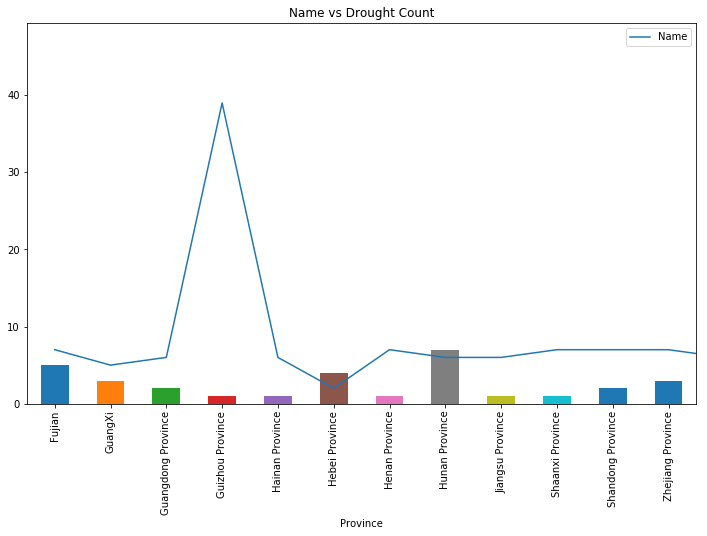

In [172]:
#we see that name successfully predict two peaks for flood
#Guizhou has long names, Guizhou has a tiny probability of getting drought
fig, ax = plt.subplots()
result.Name.plot(ax=ax)
ax.set_title('Name vs Drought Count')
df_dro.groupby('Province').Dro.count().plot(kind='bar',ax=ax)

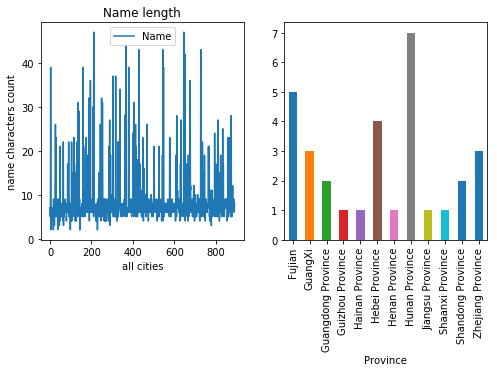

In [174]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)
ax0, ax1 = axes
result.Name.plot(ax=ax0)
ax0.set_xlabel('all cities')
ax0.set_ylabel('name characters count')
ax0.set_title('Name length')
df_dro.groupby('Province').Dro.count().plot(kind='bar',ax=ax1)

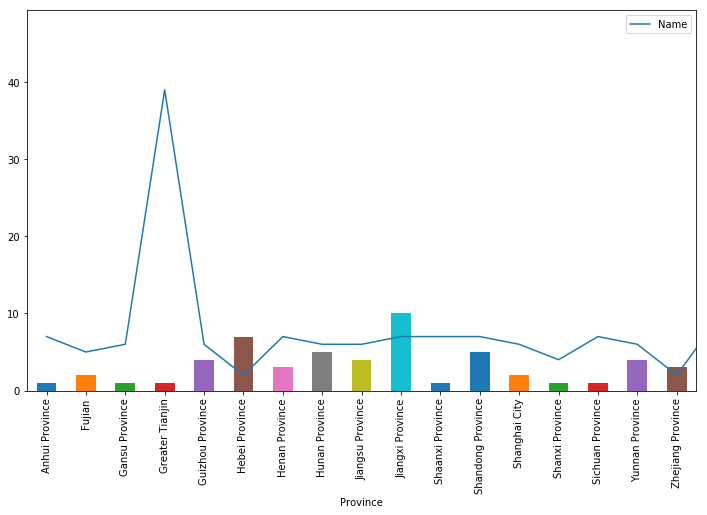

In [153]:
#we see that name successfully predict two peaks for flood
#Tianjin has long names, Tianjin has a smaller probability of getting drought
df_Flood = result.dropna(subset = ['Flood'])
df_Flood.describe()
fig, ax1 = plt.subplots()
result.Name.plot(ax=ax1)
ax.set_title('Name vs Drought Count')
df_Flood.groupby('Province').Flood.count().plot(kind='bar',ax=ax1)

In [175]:
xinmingzi = df_1800['Name'].str.len()

In [180]:
newframes = [df_1800, xinmingzi]
result_1800 = pd.concat(newframes,axis=1,sort=False)

In [181]:
result_1800[['Dro','Prec','Name']].head()

,Dro,Prec,Name,Name
0,NaN,NaN,Beijing,7
1,NaN,NaN,Miyun,5
2,NaN,NaN,Pinggu,6
3,NaN,NaN,Tong (now Tongzhou district in Beijing),39
4,NaN,NaN,Shunyi,6


In [184]:
result_1800.describe()
# we see that in 1800 the name was longer with a mean of 8.87 rather 8.80
#and for 1800 there are two more drought events amount to 33 cases than the 1830 drought events of 31,
#there are far less flood events 35
# we assumed the drought and flood events are inversely related to the name length
#but it seems like it's more complicated, more chaoic, and more variabilities that hasn't been taken into consideration

,Lat,Lon,Dro,Flood,Prec,Name
count,868.000000,868.000000,33.0,60.0,54.0,871.000000
mean,31.546796,113.649467,1.0,1.0,1.0,8.874856
std,5.008352,6.070971,0.0,0.0,0.0,6.603844
min,18.870000,23.030000,1.0,1.0,1.0,2.000000
25%,27.915000,110.807500,1.0,1.0,1.0,6.000000
50%,30.935000,114.700000,1.0,1.0,1.0,7.000000
75%,36.052500,117.392500,1.0,1.0,1.0,8.000000
max,45.830000,129.490000,1.0,1.0,1.0,47.000000


In [185]:
#focus on the drought data for now, we take out the NAs
#for the cities that have drought, will their name be longer or shorter than before?
#Surprisingly we found that the mean of name lengths increases, instead of decreases
#drought cities in 1800 in average have longer names
#the std increases but the range decreases
df_1800_dro = result_1800.dropna(subset = ['Dro'])
df_1800_dro.describe()

,Lat,Lon,Dro,Flood,Prec,Name
count,33.000000,33.000000,33.0,0.0,0.0,33.000000
mean,31.068182,111.137576,1.0,NaN,NaN,9.000000
std,4.326819,4.476538,0.0,NaN,NaN,8.685476
min,25.200000,103.380000,1.0,NaN,NaN,3.000000
25%,27.750000,108.500000,1.0,NaN,NaN,6.000000
50%,30.000000,110.650000,1.0,NaN,NaN,7.000000
75%,34.500000,113.300000,1.0,NaN,NaN,8.000000
max,40.100000,119.960000,1.0,NaN,NaN,44.000000


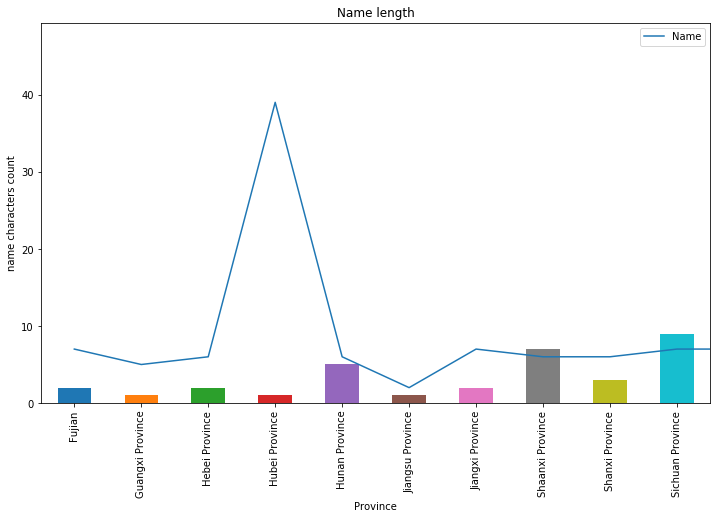

In [191]:
fig, ax2 = plt.subplots()
result_1800.Name.plot(ax=ax2)
ax2.set_xlabel('all cities')
ax2.set_ylabel('name characters count')
ax2.set_title('Name length')
df_1800_dro.groupby('Province').Dro.count().plot(kind='bar',ax=ax2)

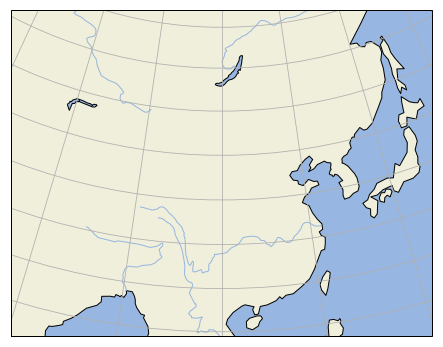

In [249]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

extent = [75, 135, 15, 60]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.gridlines()

Text(0.5,1,'1800 Drought Site in China')

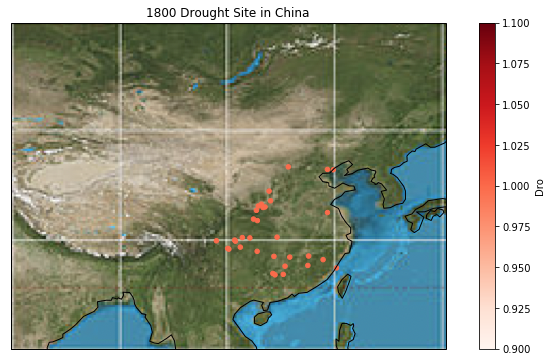

In [250]:
fig = plt.figure(figsize=(12,6))

fname = 'china.png'
img = plt.imread(fname)

img_extent = [75, 135, 15, 60]

ax = plt.axes(projection = ccrs.PlateCarree())
ax.imshow(img,origin='upper',extent = img_extent,transform = ccrs.PlateCarree())
df_1800.plot.scatter(x='Lon',y='Lat',c='Dro',cmap='Reds',ax=ax)
ax.coastlines()
ax.set_title('1800 Drought Site in China')

Text(0.5,1,'1830 Drought Site in China')

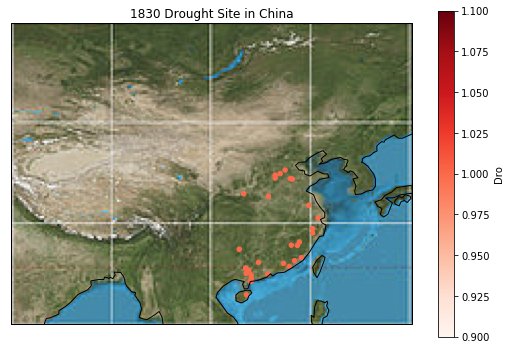

In [251]:
fig = plt.figure()

fname = 'china.png'
img = plt.imread(fname)

img_extent = [75, 135, 15, 60]

ax = plt.axes(projection = ccrs.PlateCarree())
ax.imshow(img,origin='upper',extent = img_extent,transform = ccrs.PlateCarree())
df.plot.scatter(x='Lon',y='Lat',c='Dro',cmap='Reds',figsize = (9,6),ax=ax)
ax.coastlines()
ax.set_title('1830 Drought Site in China')

Text(0.5,1,'1800 Drought Site in China')

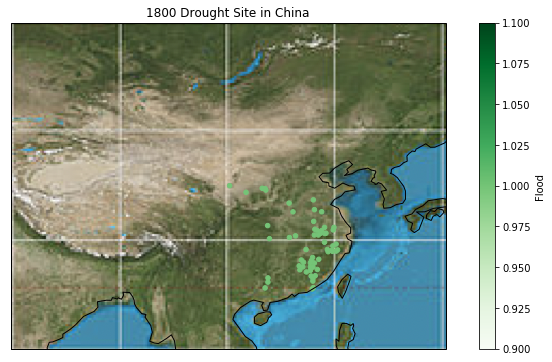

In [243]:
fig = plt.figure(figsize=(12,6))

fname = 'china.png'
img = plt.imread(fname)

img_extent = [75, 135, 15, 60]

ax = plt.axes(projection = ccrs.PlateCarree())
ax.imshow(img,origin='upper',extent = img_extent,transform = ccrs.PlateCarree())
df_1800.plot.scatter(x='Lon',y='Lat',c='Flood',cmap='Greens',ax=ax)
ax.coastlines()
ax.set_title('1800 Flood Site in China')

Text(0.5,1,'1830 Flood Site in China')

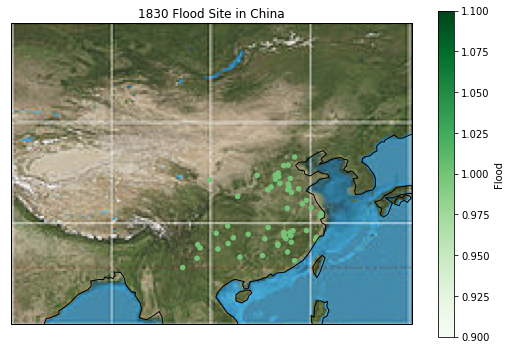

In [244]:
fig = plt.figure()

fname = 'china.png'
img = plt.imread(fname)

img_extent = [75, 135, 15, 60]

ax = plt.axes(projection = ccrs.PlateCarree())
ax.imshow(img,origin='upper',extent = img_extent,transform = ccrs.PlateCarree())
df.plot.scatter(x='Lon',y='Lat',c='Flood',cmap='Greens',figsize = (9,6),ax=ax)
ax.coastlines()
ax.set_title('1830 Flood Site in China')

# VEI in the map #

Text(0.5,1,'distribution of top 20 volcano eruptions')

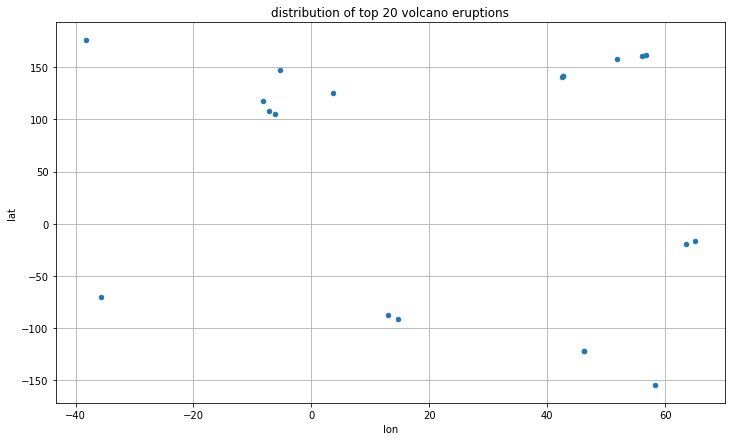

In [248]:
fig,ax66 = plt.subplots()
big = df_vei[df_vei.VEI > 4]
big.plot(kind='scatter', x='lon', y='lat', grid=True,ax=ax66)
ax66.set_title('distribution of top 20 volcano eruptions')

In [195]:
df_vei.groupby('VEI').date.count()

VEI
4    102
5     15
6      4
7      1
Name: date, dtype: int64

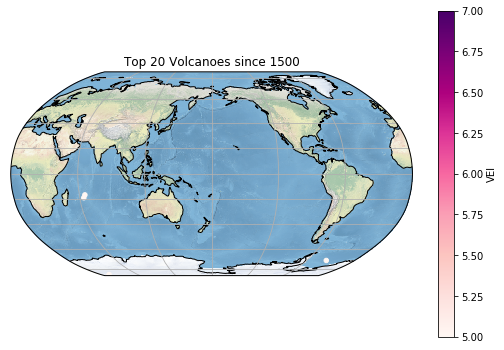

In [196]:
#first find out the top 20 volcanic activities
#create a plot and choose Robinson for a round graph
plt.figure(figsize=(9, 7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.stock_img()

#use a scatter plot and transform set to PlateCarree
big.plot(kind = 'scatter',x='lon',y='lat',c='VEI',cmap='RdPu',figsize = (9,6),ax=ax,transform = ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.gridlines()
ax.coastlines()
ax.set_title('Top 20 Volcanoes since 1500')
plt.show()

In [54]:
#fig, ax = plt.subplots()
#df.plot.scatter(x='Lon',y='Lat',c='Dro',figsize = (9,6),ax=ax)
#ax.set_title('1830 Drought Site in China')
#fig, ax = plt.subplots()
#df_1800.plot.scatter(x='Lon',y='Lat',c='Dro',figsize = (9,6),ax=ax)
#ax.set_title('1800 Drought Site in China')

In [10]:
#fig, ax1 = plt.subplots()
#df.plot.scatter(x='Lon',y='Lat',c='Prec',cmap='Blues',figsize = (9,6),ax=ax1)
#ax1.set_title('1830 Precipitation Anomalies Site in China')
#fig, ax1 = plt.subplots()
#df_1800.plot.scatter(x='Lon',y='Lat',c='Prec',cmap='Blues',figsize = (9,6),ax=ax1)
#ax1.set_title('1800 Precipitation Anomalies Site in China')

In [13]:
#fig, ax2 = plt.subplots()
#df.plot.scatter(x='Lon',y='Lat',c='Flood',cmap='Greens',figsize = (9,6),ax=ax2)
#ax2.set_title('1830 Flood Site in China')
#fig, ax2 = plt.subplots()
#df_1800.plot.scatter(x='Lon',y='Lat',c='Flood',cmap='Greens',figsize = (9,6),ax=ax2)
#ax2.set_title('1800 Flood Site in China')

In [267]:
time_mean = ds.mean(dim = 'time')
time_mean

<xarray.Dataset>
Dimensions:  (lat: 55, lon: 144)
Coordinates:
  * lat      (lat) float32 -58.75 -56.25 -53.75 -51.25 -48.75 -46.25 -43.75 ...
  * lon      (lon) float32 -178.75 -176.25 -173.75 -171.25 -168.75 -166.25 ...
Data variables:
    PDSI     (lat, lon) float32 nan nan nan nan nan nan nan nan nan nan nan ...

Text(0.5,1,'Global PDSI')

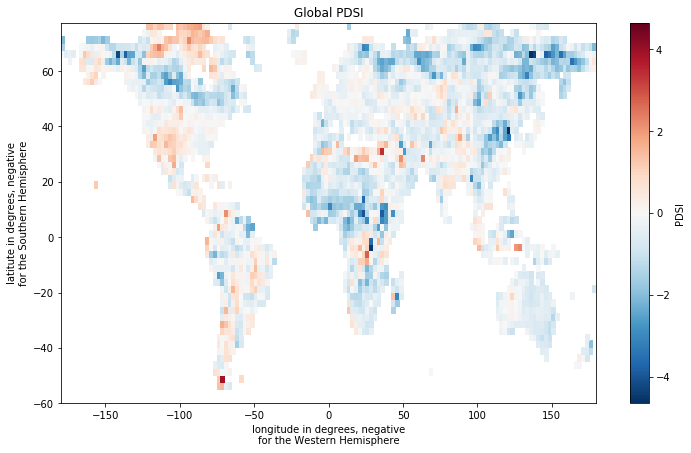

In [268]:
fig, ax11 = plt.subplots()
time_mean['PDSI'].plot(ax=ax11)
ax11.set_title('Global PDSI')